# **Machine learning (Travel Insurance Claim Analytics)**

### **Created By: Joel Bernard Leonardo**

## **Business Problem Understanding**

**Context**: <br>
Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik di dalam negeri maupun ke luar negeri. Beberapa negara bahkan mensyaratkan para pelancong untuk memiliki asuransi perjalanan, contohnya di negara-negara Eropa dan Amerika. Jumlah premi yang harus dibayarkan tergantung pada cakupan yang diinginkan, durasi perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui calon pemegang polis yang akan mengajukan klaim asuransi untuk mendapatkan perlindungan. Data pemegang polis di perusahaan asuransi adalah data historis yang mencakup tujuan perjalanan, produk asuransi, dan lain-lain

(Note: Perusahaan Travel Asuransi ini menawarkan Asuransinya lewat pihak ketiga)


**Target**:<br>
0 : Tidak mengajukan klaim asuransi

1 : mengajukan klaim asuransi


**Problem Statement** :<br>
Perushaan ingin  meningkatkan efisiensi proses klaim asuransi perjalanan dengan memanfaatkan data historis pemegang polis untuk mengidentifikasi pemegang polis yang berpotensi mengajukan klaim dan membutuhkan perlindungan, sehingga dapat mengoptimalkan sumber daya perusahaan. Perusahaan menawarkan asuransinya lewat pihak ketiga kepada setiap orang akan tetapi hal itu membuat rugi perusahaan, karena perusahaan tidak mengetahui apakah orang yang ditawarkannya akan klaim atau tidak.


**Goals** :<br>
Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan calon pemegang polis akan mengajukan klaim atau tidak. Sehingga tidak akan merugikan finasial perushaan Travel Insurance, karena Perushaan akan mengetahui calon pemegang polis tersebut dipastikan tidak akan klaim.

**Analytic Approach** :<br>
Jadi yang akan saya lakukan adalah menganalisis data untuk menemukan pola yang membedakan orang pemegang polis akan klaim atau tidak (klasifikasi).

Kemudian saya akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang akan klaim asurasi tersebut atau tidak.

**Metric Evaluation**

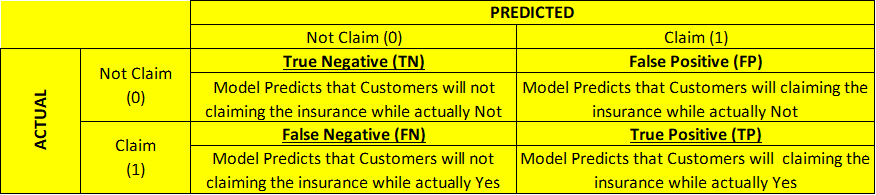


Type 1 error : False Positive,<br>
Model memprediksi Cutomer akan klaim tapi kenyataan tidak, maka perusahaan kehilangan calon customer mereka. Karena mereka tidak ditawarkan.

Type 2 error : False Negative,<br>
Model memprediksi Customer akan tidak klaim tapi kenyataan iya, maka perusahaan rugi karena harus memberi uang klaim kepada customer tersebut.

Berdasarkan Permintaan Perusahaan, saya akan membuat model yang dapat mengidetifikasi customer yang memegang polis yang akan Claim. Dan dari konsekuensi bahwa keduanya sangat penting maka dari itu saya akan fokus terhadap False Negative lebih dari False Postive, tapi tetap memperhatikan keduanya. Maka Metric utama yang saya gunakan adalah **f2**.

Note:
- f2 : recall (FN) lebih penting dari pada precision (FP), tapi tetap memperhatikan keduanya.


## Dataset Summary
DataSet Source: https://www.kaggle.com/datasets/mhdzahier/travel-insurance or Purwadhika

**Note**:
- Dataset ini adalah Sebuah Perusahaan Asuransi yang menawarkan produknya lewat pihak ketiga
- Dataset ini terakhir di Update berdasarkan Kaggel adalah 4 tahun yang lalu.
- Setiap baris data merepresentasikan informasi seorang yang pernah klaim asuransi atau tidak klaim.


### Attribute Information

| Attribute | Description |
| --- |--- |
| Agency | Name of agency (Third Party that worked together with Travel Insurance Company) |
| Agency Type | Type of travel insurance agencies |
| Distribution Channel | Channel of travel insurance agencies |
| Product Name | Name of the travel insurance products |
| Gender | Gender of insured |
| Duration | Duration of travel |
| Destination | Destination of travel |
| Net Sales | Amount of sales of travel insurance policies |
| Commission (in value) | Commission received for travel insurance agency |
| Age| Age of insured |
| Claim | Claim status |

In [2]:
# Library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno
import sklearn

# Data Split
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate,RandomizedSearchCV,StratifiedKFold

# Preporcessing|
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# function untuk scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

# function untuk impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi

from sklearn.impute import KNNImputer # regresi KKN

# modeling
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import LinearRegression , Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


# Metric
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, auc
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,fbeta_score

# Ensemble various type (modeling)
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble similiar type(modeling)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb

# Save Model
import pickle

## Load Dataset

Saya akan Load Datasetnya terlebih dahulu

In [3]:
df = pd.read_csv(r'D:\File Sekul Purwadhika\DS STUFF\Modul_3\Dataset\Project Capstone\Travel Insurance\data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


Okay saya melakukan cek Proposi dataset ini, dan hasilnya bahwa mayoritas orang yang berada historis ini tidak claim asuransi dan sedangkan yang klaim asuransi sangat dikit. Maka kemungkinan Modeling saya ini tidak dapat menghasilkan accuracy yang tinggi karena data ini proposi Claim Yes dan No sangat tidak seimbang. Tetapi saya akan mengusahakan mendapatkan accuracy yang tinggi.

In [4]:
# Proposi Data sangat tidak seimbang parah.

df['Claim'].value_counts() / len(df['Claim'])

No     0.984727
Yes    0.015273
Name: Claim, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [6]:
display('Missing Value',df.isna().sum(),'Duplicate',df.duplicated().sum())

'Missing Value'

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

'Duplicate'

4667

Terdapat 31647 baris Gender yang Missing value dan terdapa 4667 baris yang duplikat.

In [7]:
# Jumlah Data Awal

df.shape

(44328, 11)

## Data Cleaning

Dari yang saya lihat dari table dfDesc dibawah ini, ada 1 kolom yang mempunyai missing value dan kemudian ada kolom yang menarik perhatian saya adalah **Destination**. Menurut saya kemungkinan ada penulisan nama negara/Kepulauan yang tidak tepat mungkin itu format spasi atau typo, nah ini value ini tidak jelas maka saya akan memperbaiki nama negara/Kepulauan yang penulisannya tidak benar. maka Saya akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

In [8]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values >= 20:
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                         unique_values, list(df[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                         unique_values, list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Rental Vehicle Excess Insurance, Cancellation Plan, Travel Cruise Protect Family, Single Trip Travel Protect Gold, Annual Travel Protect Platinum, 24 Protect, Single Trip Travel Protect Platinum, Comprehensive Plan, Spouse or Parents Comprehensive Plan, Annual Travel Protect Gold, Single Trip Travel Protect Silver, Basic Plan, Child Comprehensive Plan, Annual Silver Plan, Annual Travel Protect Silver, Value Plan, Premier Plan, Ticket Protector, Gold Plan, 1 way Comprehensive Plan]"
4,Gender,object,31647,71.39,2,"[F, nan, M]"
5,Duration,int64,0,0.00,437,"[143, 97, 39, 279, 319, 417, 259, 386, 193, 258, 289, 264, 111, 157, 378, 369, 220, 342, 73, 222]"
6,Destination,object,0,0.00,138,"[LITHUANIA, BERMUDA, TURKEY, ANGOLA, SLOVENIA, INDIA, SINGAPORE, NETHERLANDS, NORWAY, COLOMBIA, ZAMBIA, EGYPT, URUGUAY, ZIMBABWE, VIET NAM, MAURITIUS, TURKMENISTAN, ISRAEL, VENEZUELA, CAMEROON]"
7,Net Sales,float64,0,0.00,1006,"[5.76, 10.74, 79.95, 4.44, -69.0, 46.15, 20.45, 43.0, 0.39, 25.7, 24.6, 16.1, 9.13, 146.0, 126.75, -78.0, 68.49, 119.0, -26.5, 22.61]"
8,Commision (in value),float64,0,0.00,915,"[3.08, 2.45, 14.63, 0.68, 11.75, 26.75, 13.21, 2.16, 4.54, 62.65, 124.74, 1.09, 63.35, 15.56, 20.13, 11.54, 49.65, 64.55, 16.75, 150.15]"
9,Age,int64,0,0.00,89,"[12, 13, 16, 24, 3, 21, 61, 27, 59, 77, 73, 52, 25, 15, 53, 14, 67, 51, 82, 31]"


### Remove Unused Data

Setelah saya pikirkan, saya akan hapus kolom **Gender** dari dataset ini. Dengan alasan kolom gender dihapus adalah untuk supaya analisa yang saya lakukan dan juga model ML yang nanti saya akan buat, tidak melakukan diskriminasi terhadap gender.

Dimana semestinya, gender tidak mempengaruhi/membedakan customer yang akan melakukan klaim asuransi atau tidak. (ini hanya asumsi saya saja berdasarkan pengalaman dan pengetahuan saya, boleh saja anda buktikan kembali sendiri)

In [9]:
df.drop(['Gender'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Duration              44328 non-null  int64  
 5   Destination           44328 non-null  object 
 6   Net Sales             44328 non-null  float64
 7   Commision (in value)  44328 non-null  float64
 8   Age                   44328 non-null  int64  
 9   Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.4+ MB


### Drop Duplicate

Tahap ini adalah saya akan hapus data yang duplikat, jika tidak dihapus akan beresiko overfitting.

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Correction Format Writing
Sekarang saya akan cek format penulisan yang ada di kolom **Destination**.

In [11]:
df['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIET NAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'NETHERLANDS',
       'SWEDEN', 'MYANMAR', 'KENYA', 'CZECH REPUBLIC', 'FRANCE',
       'RUSSIAN FEDERATION', 'PAKISTAN', 'ARGENTINA',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       'CAYMAN ISLANDS', 'PANAMA', 'BANGLADESH', 'TURKME

In [12]:
df['Destination'].replace({'VIET NAM': 'VIETNAM','MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF':'NORTH MACEDONIA'},inplace=True)

In [13]:
df['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIETNAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'NETHERLANDS',
       'SWEDEN', 'MYANMAR', 'KENYA', 'CZECH REPUBLIC', 'FRANCE',
       'RUSSIAN FEDERATION', 'PAKISTAN', 'ARGENTINA',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       'CAYMAN ISLANDS', 'PANAMA', 'BANGLADESH', 'TURKMEN

Setelah saya lihat ternyata ada beberapa penulisan yang harus diganti:
- Vietnam: Tulisan Vietnam seharusnya tidak dipisah (VIET NAM).
- MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF: Nama tersebut sudah tidak pakai, walaupun menurut saya masih bisa aja di tulis seperti ini tapi yang umum negara tersebut di ganti menjadi "North Macedonia" pada tahun 2019 (Refrensi Google).<br>

Jadi hanya 2 perbaikan nama saja yang perlu diperbaiki. Walaupun perbaikan ini tidak memberi dampak saat modeling. Tapi tidak apa apa.

Selanjutnya saya ingin mengecek format penulisan kolom Numeric, apakah kolom ada formatnya yang salah atau tidak.

In [14]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39324.000000,39324.00000,39324.000000,39324.000000
mean,52.275989,42.20253,10.386189,39.833054
std,113.404932,49.70403,20.345275,13.225494
min,-1.000000,-357.50000,0.000000,0.000000
25%,11.000000,19.00000,0.000000,35.000000
50%,25.000000,29.00000,0.000000,36.000000
75%,57.000000,50.00000,11.880000,44.000000
max,4881.000000,810.00000,283.500000,118.000000


Duration

In [15]:
df[df['Duration'] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


In [16]:
display(df[df['Duration'] <= 0].head(), len(df[df['Duration'] == 0]))

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
242,JZI,Airlines,Online,Basic Plan,0,CHINA,22.00,7.70,34,No
1782,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,1.80,0.50,48,No
1853,JWT,Airlines,Online,Value Plan,0,INDIA,62.00,24.80,118,No
2558,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,9.77,2.74,48,No
3236,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,0,INDIA,35.25,22.91,24,No


34

Net Sales

In [17]:
df[(df['Net Sales'] < 0) & (df['Claim']== 'No')]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.40,35.64,41,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,77,JAPAN,-29.70,17.82,59,No
199,EPX,Travel Agency,Online,Cancellation Plan,29,HONG KONG,-12.00,0.00,36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,57,AUSTRALIA,-59.40,35.64,28,No
...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,140,UNITED STATES,-98.00,0.00,29,No
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,23,MALAYSIA,-29.70,17.82,29,No
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,147,SPAIN,-68.00,0.00,36,No
43858,EPX,Travel Agency,Online,Cancellation Plan,49,UNITED KINGDOM,-68.00,0.00,36,No


In [18]:
df[(df['Net Sales'] < 0) & (df['Claim']== 'Yes')]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


In [19]:
df[(df['Net Sales'] == 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
45,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,24,UNITED ARAB EMIRATES,0.0,23.76,27,No
60,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,14,AUSTRALIA,0.0,17.82,31,No
63,EPX,Travel Agency,Online,Cancellation Plan,100,UNITED STATES,0.0,0.00,37,No
75,C2B,Airlines,Online,Silver Plan,23,SINGAPORE,0.0,5.63,25,No
78,EPX,Travel Agency,Online,Cancellation Plan,73,BELGIUM,0.0,0.00,36,No
...,...,...,...,...,...,...,...,...,...,...
44168,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13,CANADA,0.0,41.58,31,No
44207,EPX,Travel Agency,Online,2 way Comprehensive Plan,152,UNITED STATES,0.0,0.00,49,No
44268,JZI,Airlines,Online,Basic Plan,8,HONG KONG,0.0,12.25,69,No
44273,EPX,Travel Agency,Online,Cancellation Plan,52,PHILIPPINES,0.0,0.00,36,No


In [20]:
df[(df['Net Sales'] == 0) & (df['Claim']== 'Yes')]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Age

In [21]:
df[(df['Age'] == 0)]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
37815,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,-30.0,10.5,0,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.5,0,No


Setelah di cek, bahwa diatas ini ada 3 kolom yaitu, **Duratian , Net Sales & Age** yang mempunyai Value Negative dan Nol, Berikut Action saya:
- Duration: 
    - Untuk Kolom ini terdapat 2 baris yang mempunyai Duration ber value negatif, menurut asumsi saya kolom ini terjadi karena terjadinya salah input maka dari itu saya akan mengubah menjadi Postif.<br>

    - Terdapat 34 baris Duration valuenya 0. Disini saya putuskan untuk drop saja, karena hanya 34 baris jadi menurut saya datasaya masih cukup banyak.

- Net Sales: 
    - Untuk kolom ini terdapat 478 kolom yang Net Sales negatif, menurut asumsi saya berdasarkan pengetahuan. Kolom ini terjadi value negatif disebabkan karena Customernya Cancel Travel Insurance mereka, maka terjadi nilai negatif. Tetapi pada kasus ini model saya hanya berfokus orang tidak cancel Travel Insurance, saya akan drop 478 baris tersebut.
    
    - Terdapat 1248 baris yang Net Sales bernilai 0, Saya asumsikan bahwa data ini terjadi kesalahan Human Error atau Mesin. Maka opsi untuk drop bukan terbaik karena menurut saya 1248 baris itu adalah data yang cukup berguna. Maka dari itu saya akan mengubah Value 0 tersebut dengan NaN agar saya bisa isi dengan metode Impute. (Saya akan ubah menjadi Nan setelah saya melakukan EDA saja.)

- Age:
    - Kolom ini terdapat Age yang value 0 hanya berjumlah 2 baris, maka dari itu saya akan drop saja.


Note: Commision (in value) ada nilai 0 saya anggap tidak apa-apa, kemungkinan karena perjanjian kontrak.

In [22]:
# Duration
df['Duration'] = df['Duration'].abs()

Duration_to_drop = df[df['Duration'] == 0].index
df.drop(Duration_to_drop, inplace=True)

In [23]:
# Net Sales
Netsales_to_drop = df[df['Net Sales'] < 0].index
df.drop(Netsales_to_drop, inplace=True)

In [24]:
# Age
Age_to_drop = df[df['Age'] <= 0].index
df.drop(Age_to_drop, inplace=True)

In [25]:
df.shape

(38812, 10)

In [26]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values >= 20:
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                         unique_values, list(df[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                         unique_values, list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,26,"[Gold Plan, Annual Gold Plan, Travel Cruise Protect, Basic Plan, Child Comprehensive Plan, Cancellation Plan, Bronze Plan, 1 way Comprehensive Plan, Travel Cruise Protect Family, 2 way Comprehensive Plan, Value Plan, Annual Travel Protect Gold, Rental Vehicle Excess Insurance, Ticket Protector, Annual Travel Protect Platinum, Annual Travel Protect Silver, Premier Plan, Spouse or Parents Comprehensive Plan, Silver Plan, Comprehensive Plan]"
4,Duration,int64,0,0.0,434,"[285, 283, 411, 531, 195, 102, 444, 54, 393, 110, 8, 125, 179, 403, 27, 149, 202, 278, 23, 385]"
5,Destination,object,0,0.0,137,"[ITALY, TURKMENISTAN, UNITED ARAB EMIRATES, MEXICO, CAYMAN ISLANDS, LUXEMBOURG, GUINEA-BISSAU, VIETNAM, BELGIUM, CYPRUS, THAILAND, PAPUA NEW GUINEA, NEPAL, TUNISIA, LEBANON, CANADA, LATVIA, GUYANA, IRAN, ISLAMIC REPUBLIC OF, INDONESIA]"
6,Net Sales,float64,0,0.0,885,"[39.76, 105.0, 14.68, 5.09, 7.35, 87.1, 36.75, 2.46, 8.26, 8.62, 0.64, 146.0, 168.0, 10.04, 297.05, 61.1, 2.12, 35.5, 70.0, 146.25]"
7,Commision (in value),float64,0,0.0,913,"[16.16, 64.38, 1.82, 54.0, 46.8, 8.25, 3.15, 112.31, 25.84, 150.15, 132.99, 59.88, 6.47, 50.13, 3.04, 4.88, 5.04, 0.86, 4.54, 28.28]"
8,Age,int64,0,0.0,88,"[8, 18, 20, 65, 9, 29, 12, 30, 11, 78, 1, 69, 72, 16, 79, 61, 77, 52, 28, 17]"
9,Claim,object,0,0.0,2,"[No, Yes]"


## Data Understanding (Brief EDA)




**Correlation**

Disini Saya ingin melihat hubungan korelasi antar fitur.<br>

Note: Correlation method ini hanya berlaku pada kolom numeric antar numeric.

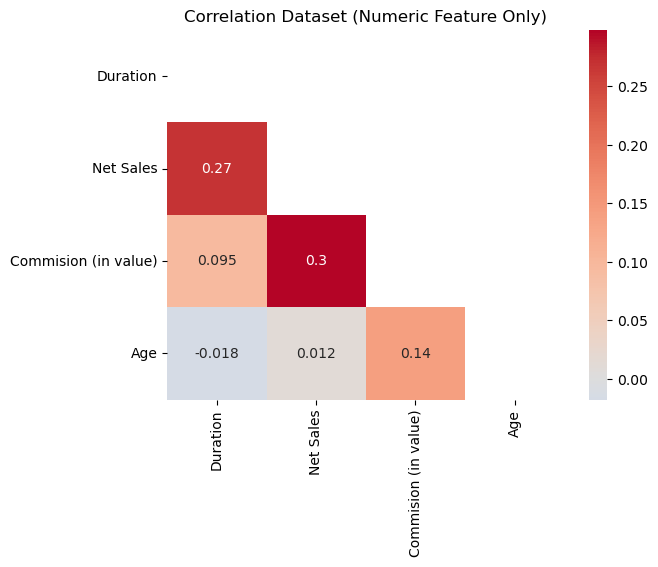

In [27]:
df_numeric = df.select_dtypes(include='number')

matrix = np.triu(df_numeric.corr(method='spearman'))

sns.heatmap(
    data=df_numeric.corr(method='spearman'),
    annot= True,            
    cmap= 'coolwarm',       
    center= 0,              
    mask= matrix
)
plt.title('Correlation Dataset (Numeric Feature Only)');

Insigth:
- Fitur yang mempunyai korelasi positif paling kuat adalah Net Sales dangan Duration & Commision (in value) dengan Net Sales.
- Fitur yang mempunyai korelasi negatif lemah adalah Age dengan duration.
- Fitur yang mempunyai korelasi postifi lemah adalah Age dengan Net Sales

**Data Spread**

Di sini saya akan melakukan EDA untuk Data Spread menggunakan Graphical Method yaitu Boxplot dan Hisplot. Saya melakukan hal ini karena saya belum melakukan pengecekan penyebaran data.

In [28]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,38812.000000,38812.000000,38812.000000,38812.000000
mean,52.004741,43.485553,10.218663,39.818432
std,113.782663,48.359454,20.210324,13.165048
min,1.000000,0.000000,0.000000,1.000000
25%,11.000000,19.800000,0.000000,35.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,56.000000,50.000000,11.880000,44.000000
max,4881.000000,810.000000,283.500000,118.000000


In [29]:
Num_feat= df.describe().columns

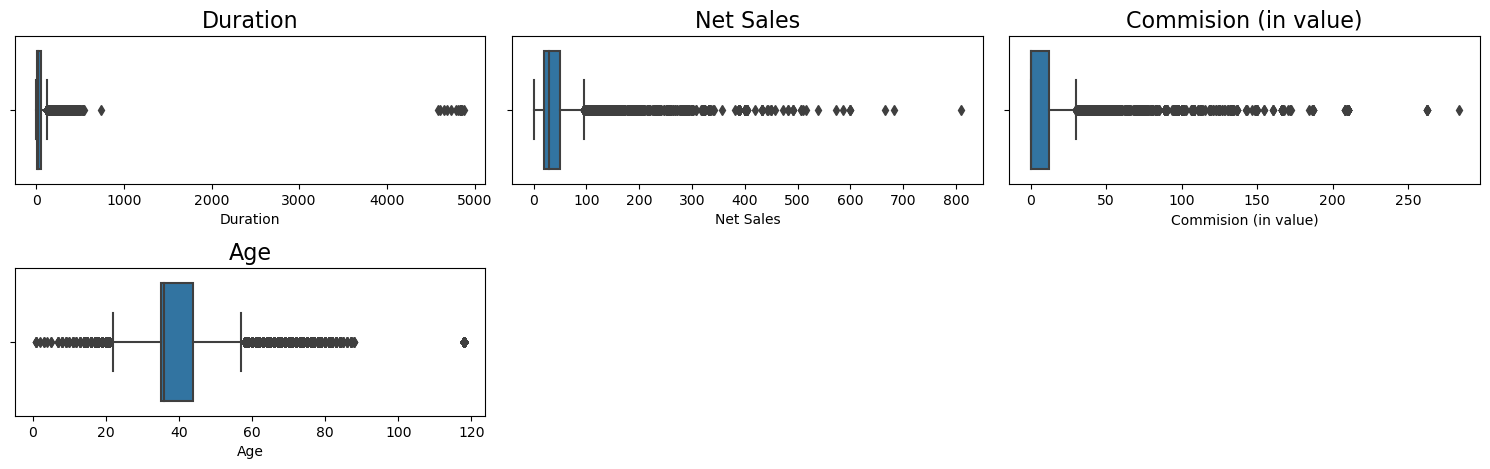

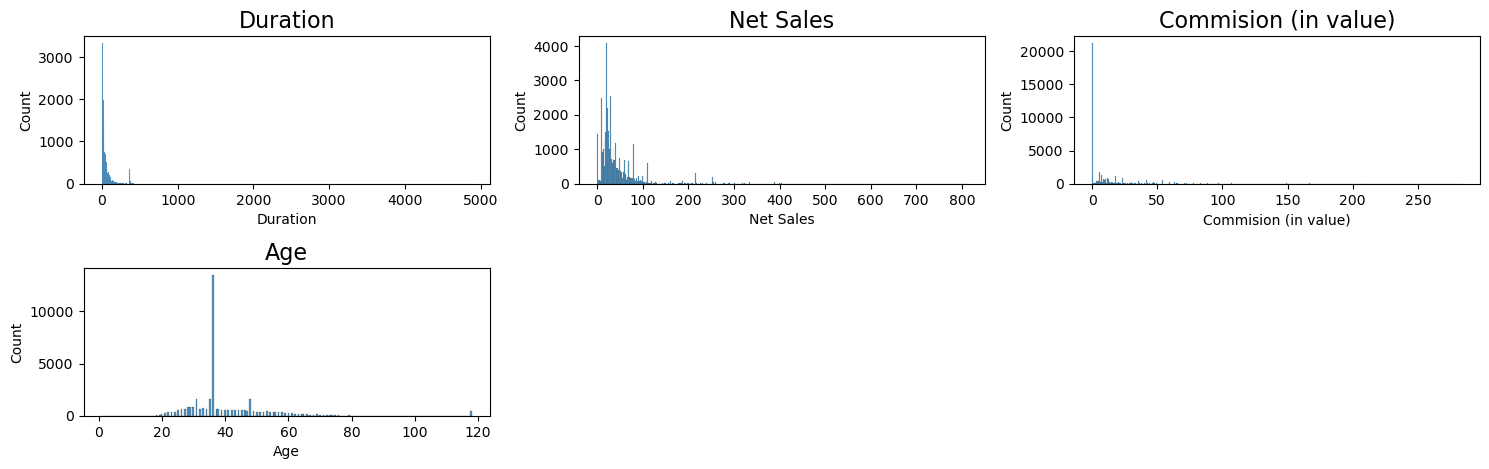

In [30]:
# melihat data outlayers pada setiap feature (kolom numerikal)
plt.figure(figsize=(15, 9))
plotnumber = 1
    
for feature in Num_feat:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

# melihat data outlayers pada setiap feature (kolom numerikal)
plt.figure(figsize=(15, 9))
plotnumber = 1
    
for feature in Num_feat:
    ax = plt.subplot(4,3, plotnumber)
    sns.histplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Kesimpulan yang saya bisa ambil bahwa rata-rata dataset ini tidak terdistribusi normal dan mempunyai Outlier.<br>

Disini saya melihat nilai outlier yang berada pada kolom **Duration**. Menurut Pengetahuan saya, Duration yang diberikan pihak asuransi akan cover paling lama **1 tahun** (berdasarkan refrensi seperti Annual TravelPro dari Allianz). Maka dari itu saya akan drop data yang Durationnya lebih dari **365 hari**.

In [31]:
df[df['Duration']>365]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
13,C2B,Airlines,Online,Annual Silver Plan,376,SINGAPORE,252.85,63.21,43,Yes
50,LWC,Travel Agency,Online,Annual Travel Protect Gold,370,CHINA,204.60,132.99,39,Yes
53,C2B,Airlines,Online,Annual Silver Plan,366,SINGAPORE,216.00,54.00,37,No
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
226,TTW,Travel Agency,Offline,Individual Comprehensive Plan,368,SINGAPORE,97.00,0.00,37,No
...,...,...,...,...,...,...,...,...,...,...
44142,C2B,Airlines,Online,Annual Silver Plan,400,SINGAPORE,252.85,63.21,30,No
44210,C2B,Airlines,Online,Annual Gold Plan,378,SINGAPORE,333.00,83.25,47,No
44217,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,216.00,54.00,38,No
44224,C2B,Airlines,Online,Annual Silver Plan,390,SINGAPORE,301.00,75.25,48,Yes


In [32]:
Duration_day_to_drop_Out = df[df['Duration'] > 365].index
df.drop(Duration_day_to_drop_Out, inplace=True)

In [33]:
df.shape

(37952, 10)

Kemudian terdapat juga nilai outliernya di kolom **Age** sangat jauh sendiri. Saya akan cek nilai outlier tersebut

In [34]:
df[df['Age']>100]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...
43838,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,No
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,No


In [35]:
Age_day_to_drop_Out = df[df['Age'] > 100].index
df.drop(Age_day_to_drop_Out, inplace=True)

Terdapat 408 baris yang value di kolom **Age** yang dimana Customernya berumur 118 Tahun. Disini saya putuskan drop saja, karena setelah saya lihat rentang di boxplot sangat cukup jauh dari nilai outlier yang lain.

Okay, Tahap Cleaning Saya sudah selesai<br>
Berati sisa data yang saya miliki sekarang ada 37544 baris dengan data yang bermula 44328 baris.

In [36]:
df.shape

(37544, 10)

#### Data Analisa

Okay, Disini saya ingin melakukan EDA singkat. Saya ingin melihat Berapa banyak Customer yang Perushaan Travel Ansurance dapatkan berdasarkan Pihak ketiga dan kemudian saya bagi lagi berdasarkan Orang itu Claim atau tidak.

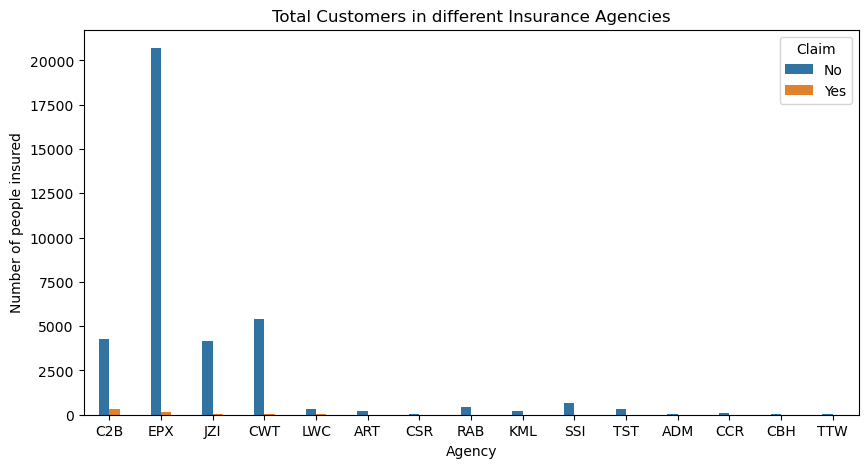

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Agency', width=0.4, hue='Claim')
plt.xlabel("Agency")
plt.ylabel("Number of people insured")
plt.title("Total Customers in different Insurance Agencies")
plt.show();

Setelah saya lihat, ada beberapa Insight yang saya dapatkan:
- Data Claim terlihat Inbalance maka dari itu saat modeling saya akan mencoba menggunakan metode Resample.
- Ternyata EPX adalah Pihak ketiga yang berhasil menawarkan Travel Insurance dengan banyak Customers.



Okay, Setelah saya sudah melakukan EDA singkat sekarang saya akan mengubah terlebih dahulu Value **Net Sales** yang 0 menjadi NaN seperti yang saya bilang sebelumnya. 

In [38]:
df['Net Sales'].replace(0, np.NaN,inplace=True)

In [39]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values >= 20:
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                         unique_values, list(df[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                         unique_values, list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,15,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, ADM, CCR, CBH, TTW]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Bronze Plan, Basic Plan, Annual Silver Plan, Single Trip Travel Protect Silver, Annual Gold Plan, Travel Cruise Protect, Value Plan, Annual Travel Protect Gold, Child Comprehensive Plan, Cancellation Plan, Comprehensive Plan, 2 way Comprehensive Plan, Gold Plan, Rental Vehicle Excess Insurance, Silver Plan, Individual Comprehensive Plan, Single Trip Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Ticket Protector, Single Trip Travel Protect Gold]"
4,Duration,int64,0,0.00,330,"[163, 177, 81, 216, 140, 111, 175, 138, 125, 182, 280, 97, 120, 91, 54, 179, 260, 249, 144, 200]"
5,Destination,object,0,0.00,136,"[EGYPT, ECUADOR, BERMUDA, FRENCH POLYNESIA, AUSTRALIA, GUADELOUPE, OMAN, PHILIPPINES, CAYMAN ISLANDS, UKRAINE, RWANDA, UNITED ARAB EMIRATES, UGANDA, INDONESIA, TUNISIA, LEBANON, REUNION, CHILE, FIJI, BOLIVIA]"
6,Net Sales,float64,1215,3.24,852,"[2.57, 449.25, 94.0, 9.9, 53.0, 66.0, 4.95, 20.45, 68.49, 18.34, 61.0, 100.01, 442.0, 3.68, 7.34, 0.84, 165.5, 280.8, 3.43, 54.5]"
7,Commision (in value),float64,0,0.00,865,"[78.28, 4.0, 55.48, 4.03, 40.25, 74.88, 11.58, 28.0, 63.35, 50.5, 2.96, 18.38, 0.13, 26.0, 15.0, 13.86, 9.25, 1.75, 52.65, 19.6]"
8,Age,int64,0,0.00,87,"[67, 31, 22, 68, 62, 12, 65, 35, 44, 32, 17, 45, 81, 56, 27, 10, 36, 37, 38, 88]"
9,Claim,object,0,0.00,2,"[No, Yes]"


Kemudian Sebelum saya  define X & y, saya akan mengubah nilai target yaitu **Claim** menajadi numerik, karena machine learning itu tidak dapat mengolah nilai berformat Object/Text  maka diubah terlebih dahulu menjadi numerik

In [40]:
df['Claim'] = np.where(df['Claim'] == 'Yes', 1, 0)
df['Claim'].value_counts()

0    36969
1      575
Name: Claim, dtype: int64

## Define X & y

Saya disini tentukan Varible X nya sebagai fitur dan y sebagai target modeling saya ini.

In [41]:
X = df.drop(columns='Claim')
y = df['Claim']

In [42]:
# Proposi Data Claim Yes (1) dan No (0)
y.value_counts()

0    36969
1      575
Name: Claim, dtype: int64

## Data Splitting

Kemudian tahap ini saya melakukan Data Splitting, Berikut hal yang saya lakukan:
- Saya tentu X dan y untuk saya pisahkan untuk train set dan test set.
- **test_size** saya tentukan `0.2` yang artinya saya memilih 20% proporsi data yang akan dialokasikan sebagi test set.
- **random_state** saya tentukan `42` agar menghasilkan pemilihan data acak untuk train set dan test set yang sama selalu saat kode ini di jalankan.
-  **stratify** ini saya masukan `y` yang artinya saya mau proposi test set dan train set itu sama. Dan alasan saya masukan ini karena Target kita adalah bertipe kategorikal maka harus proposinya train set & test set sama.

In [43]:
X_train, X_test, y_train, y_test =train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Preprocessing

Sekarang saya lakukan tentukan fitur-fitur apa saja yang perlu di Encoding,Scale dan Impute.  Dan di ingat mungkin parameter yang saya tentukan belum tentu cocok maka dari itu akan saya tuning pada tahap Hyperparameter Tuning.

Encoding
- Onehot Encoder: Saya menentukan fitur `Agency Type & Distribution Channel` menggunakan Onehot, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
- Binary Encoder: Saya menentukan fitur `Agency, Product Name & Destination` menggunakan Binary,karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila saya menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau saya menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu saya akan mencoba menggunakan Binary Encoding.

Impute
- Iterative Imputer: Saya mentukan fitur `Net Sales` menggunakan Iterative Imputer, karena metode ini mengisi nilai yang hilang dengan informasi dari varible lain. Bila saya menggunakan simple imputer mean atau median, maka hal ini kurang cocok/kurang baik. Dan begitu juga KNN, metode ini mengisi nilai yang hilang dengan nilai dari tetangga terdekat maka menurut saya hal ini kurang baik juga.

Scale
- Robust Scaler: Saya menentukan `Duration, Net Sales, Commision (in value) & Age` menggunakan Scale Robust, karena value yang terdapat kolom ini mempunyai nilai outlier. Oleh karena itu saya akan mencoba menggunakan metode ini.


In [44]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values >= 20:
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                         unique_values, list(df[col].drop_duplicates().sample(20).values)]);
    else:
        listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                         unique_values, list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,15,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, ADM, CCR, CBH, TTW]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Individual Comprehensive Plan, Annual Travel Protect Gold, Silver Plan, Child Comprehensive Plan, Ticket Protector, Single Trip Travel Protect Gold, Annual Silver Plan, Comprehensive Plan, Rental Vehicle Excess Insurance, Premier Plan, 2 way Comprehensive Plan, Annual Travel Protect Platinum, Travel Cruise Protect Family, Bronze Plan, 24 Protect, Basic Plan, 1 way Comprehensive Plan, Spouse or Parents Comprehensive Plan, Single Trip Travel Protect Silver, Cancellation Plan]"
4,Duration,int64,0,0.00,330,"[312, 273, 99, 66, 59, 83, 21, 128, 187, 78, 23, 319, 1, 69, 16, 44, 138, 117, 115, 331]"
5,Destination,object,0,0.00,136,"[GERMANY, PANAMA, JAMAICA, MALI, RWANDA, ROMANIA, TUNISIA, CHINA, RUSSIAN FEDERATION, PAPUA NEW GUINEA, SWEDEN, MOROCCO, ZAMBIA, GUYANA, BAHRAIN, UNITED ARAB EMIRATES, BOLIVIA, QATAR, SENEGAL, INDONESIA]"
6,Net Sales,float64,1215,3.24,852,"[472.0, 56.5, 54.75, 388.8, 41.0, 227.7, 4.24, 149.0, 72.8, 85.71, 118.3, 1.16, 187.85, 74.5, 54.6, 45.5, 117.75, 169.0, 29.4, 37.5]"
7,Commision (in value),float64,0,0.00,865,"[59.88, 19.0, 19.05, 50.49, 42.18, 0.71, 89.38, 97.34, 63.38, 5.98, 8.96, 2.46, 22.75, 2.81, 114.25, 12.3, 6.96, 36.3, 15.5, 46.25]"
8,Age,int64,0,0.00,87,"[75, 37, 30, 58, 54, 74, 41, 17, 28, 63, 4, 33, 2, 82, 69, 81, 72, 86, 66, 49]"
9,Claim,int32,0,0.00,2,"[0, 1]"


In [45]:
# Membuat variable untuk masing-masing kelompok fitur regrsi dan klasifikasi

Numeric_feat = Num_feat
Category_feat_least = ['Agency Type','Distribution Channel'] # Unique valuenya dikit
Category_feat_Most = ['Agency', 'Product Name','Destination'] # Unique valuenya banyak

Disini saya akan membuat 2 skenario, menggunakan Polynomial dan tanpa Polynomial. Dan perlu di ingat metode ini hanya bertujuan untuk menambahakan fitur lagi khusus fitur yang mempunyai nilai numerik dari awal, saya melakukan hal ini untuk menghindari Underfitting dimana model saya tidak bisa menangkap pola dikarenakan kekurangan fitur.

In [46]:
# Tanpa Poly

Impute_Scale_Num = Pipeline([
    ('Impute',IterativeImputer()),
    ('Scale',RobustScaler())
])

transformer = ColumnTransformer([
    ('Numeric',Impute_Scale_Num,Numeric_feat),
    ('Category_least',OneHotEncoder(),Category_feat_least),
    ('Category_most',BinaryEncoder(),Category_feat_Most)
],remainder='passthrough')

In [47]:
# Dengan Poly

poly = PolynomialFeatures(degree=2)

Impute_Scale_Num_poly = Pipeline([
    ('Impute',IterativeImputer()),
    ('Poly',poly),
    ('Scale',RobustScaler())
])

transformer_2 = ColumnTransformer([
    ('Numeric',Impute_Scale_Num_poly,Numeric_feat),
    ('Category_least',OneHotEncoder(),Category_feat_least),
    ('Category_most',BinaryEncoder(),Category_feat_Most)
],remainder='passthrough')

## Cross Validation

Pada tahap ini saya akan melakukan Cross Val, dimana artinya saya mencari model terbaik dengan parameter default dan Preprocessing yang saya tentukan.

Dibawah ini saya akan terlebih dahulu define scoring, Algo dan Resampling

Note: Pada Resampling saya akan menggunakan SMOTE dan Nearmiss saja. Dikarenakan bahawa dataset ini mempunyai karkteristik imbalance yang sangat parah dan mengapa itu saya tidak ikut menyertakan Oversampling dan Undersampling, berikut perbedaanya:

        - SMOTE: Menghasilkan data sintensi baru untuk data yang minoritas yang sudah memang ada di dataset (Jadi Regenerate Data Sintesi yang berasal dari data sebelumnya) sedangkan oversampling itu duplikat yang sudah ada.

        - Nearmiss: Memilih sample-sample mayoritas yang memiliki jarak terdekat dengan sampel-sampel minoritas untuk dikurangi, sedangkan Undersampling mengurangin data mayoritasnya tanpa memilihnya.

Scoring<br>

In [48]:
f2 = make_scorer(fbeta_score,beta=2)

Algo<br>

In [49]:
logreg = LogisticRegression(random_state=42, max_iter=10000)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(random_state=42)

# voting (ensemble)
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
]) 

# stacking (ensemble)
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg),
        ('clf2', knn),
        ('clf3', tree)
        ],
    final_estimator= logreg
)

bagging = BaggingClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)


Resampling<br>

In [50]:
smote = SMOTE(random_state=42,k_neighbors=5)
nearmiss = NearMiss(version=1)

In [51]:
list_resamlping = [None,smote,nearmiss]
list_algo = [logreg,knn,tree,voting,stacking,bagging,random_forest,adaboost,gboost,xgboost,lgbm]

---

Skenario 1 (Tanpa Poly)

In [ ]:
cv_resample = []
cv_mean = []
cv_std = []
cv_all = []
cv_algo = []


for resample in list_resamlping:
    for algo in list_algo:
        
        model_pipe = Pipeline([
            ('prep',transformer), 
            ('resampling',resample),
            ('model', algo)])
        
        model_cv = cross_val_score(
            estimator = model_pipe, 
            X = X_train, 
            y = y_train, 
            cv = 5, 
            scoring = f2,
            error_score='raise'
            )
        
        cv_resample.append(resample)
        cv_algo.append(algo)
        cv_mean.append(model_cv.mean())
        cv_std.append(model_cv.std())
        cv_all.append(model_cv.round(4))

In [ ]:
df_cv = pd.DataFrame({
    'algo': cv_algo,
    'resamp': cv_resample,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv.sort_values('mean',ascending=False).head(10)

,algo,resamp,mean,std,all
19,GradientBoostingClassifier(random_state=42),SMOTE(random_state=42),0.224770,0.013891,"[0.2437, 0.213, 0.2192, 0.2092, 0.2388]"
18,AdaBoostClassifier(random_state=42),SMOTE(random_state=42),0.219539,0.013222,"[0.2131, 0.2308, 0.2301, 0.1964, 0.2273]"
11,"LogisticRegression(max_iter=10000, random_state=42)",SMOTE(random_state=42),0.190593,0.014644,"[0.1954, 0.2061, 0.1802, 0.1676, 0.2037]"
14,"VotingClassifier(estimators=[('clf1',\n LogisticRegression(max_iter=10000,\n random_state=42)),\n ('clf2', KNeighborsClassifier()),\n ('clf3', DecisionTreeClassifier(random_state=42))])",SMOTE(random_state=42),0.175304,0.015466,"[0.1989, 0.1874, 0.1689, 0.157, 0.1644]"
21,LGBMClassifier(random_state=42),SMOTE(random_state=42),0.163343,0.037251,"[0.2064, 0.1124, 0.1885, 0.1839, 0.1254]"
12,KNeighborsClassifier(),SMOTE(random_state=42),0.153896,0.014409,"[0.1802, 0.1575, 0.1465, 0.139, 0.1463]"
20,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=42, ...)",SMOTE(random_state=42),0.097177,0.036820,"[0.1528, 0.0422, 0.0862, 0.1179, 0.0868]"
13,DecisionTreeClassifier(random_state=42),SMOTE(random_state=42),0.092569,0.017041,"[0.1184, 0.0939, 0.1024, 0.0746, 0.0735]"
16,BaggingClassifier(random_state=42),SMOTE(random_state=42),0.089164,0.021313,"[0.0984, 0.0869, 0.1107, 0.1005, 0.0493]"
17,RandomForestClassifier(random_state=42),SMOTE(random_state=42),0.083897,0.009585,"[0.0951, 0.0943, 0.0783, 0.0817, 0.0701]"


Skenario 2 (Dengan Poly)

In [ ]:
cv2_resample = []
cv2_mean = []
cv2_std = []
cv2_all = []
cv2_algo = []


for resample in list_resamlping:
    for algo in list_algo:
        
        model_pipe_2 = Pipeline([
            ('prep',transformer_2), 
            ('resampling',resample),
            ('model', algo)])
        
        model_cv2 = cross_val_score(
            estimator = model_pipe_2, 
            X = X_train, 
            y = y_train, 
            cv = 5, 
            scoring = f2,
            error_score='raise'
            )
        
        cv2_resample.append(resample)
        cv2_algo.append(algo)
        cv2_mean.append(model_cv2.mean())
        cv2_std.append(model_cv2.std())
        cv2_all.append(model_cv2.round(4))

In [ ]:
df_cv2 = pd.DataFrame({
    'algo': cv2_algo,
    'resamp': cv2_resample,
    'mean': cv2_mean,
    'std': cv2_std,
    'all': cv2_all
})

df_cv2.sort_values('mean',ascending=False).head(10)

,algo,resamp,mean,std,all
19,GradientBoostingClassifier(random_state=42),SMOTE(random_state=42),0.236859,0.018948,"[0.2465, 0.2117, 0.2475, 0.2176, 0.261]"
18,AdaBoostClassifier(random_state=42),SMOTE(random_state=42),0.233453,0.015923,"[0.2234, 0.2355, 0.2381, 0.2113, 0.259]"
11,"LogisticRegression(max_iter=10000, random_state=42)",SMOTE(random_state=42),0.197071,0.016062,"[0.205, 0.2032, 0.1865, 0.1722, 0.2185]"
14,"VotingClassifier(estimators=[('clf1',\n LogisticRegression(max_iter=10000,\n random_state=42)),\n ('clf2', KNeighborsClassifier()),\n ('clf3', DecisionTreeClassifier(random_state=42))])",SMOTE(random_state=42),0.194871,0.017542,"[0.2281, 0.1944, 0.1769, 0.1859, 0.1892]"
12,KNeighborsClassifier(),SMOTE(random_state=42),0.164760,0.015300,"[0.1876, 0.1574, 0.1749, 0.1429, 0.1611]"
21,LGBMClassifier(random_state=42),SMOTE(random_state=42),0.131052,0.029495,"[0.1667, 0.0868, 0.161, 0.121, 0.1198]"
13,DecisionTreeClassifier(random_state=42),SMOTE(random_state=42),0.105403,0.015675,"[0.1184, 0.1232, 0.0874, 0.1119, 0.086]"
15,"StackingClassifier(estimators=[('clf1',\n LogisticRegression(max_iter=10000,\n random_state=42)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(random_state=42))],\n final_estimator=LogisticRegression(max_iter=10000,\n random_state=42))",SMOTE(random_state=42),0.094693,0.009004,"[0.1009, 0.0971, 0.0775, 0.1028, 0.0951]"
17,RandomForestClassifier(random_state=42),SMOTE(random_state=42),0.088935,0.011435,"[0.0935, 0.0872, 0.0682, 0.1024, 0.0934]"
20,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=42, ...)",SMOTE(random_state=42),0.077318,0.024749,"[0.1142, 0.0451, 0.0939, 0.0759, 0.0575]"


Setelah melihat hasil dengan poly dan tanpa poly, Berikut Perbandingannya:
- Degan Polynomial -- Accuracy naik sedikit dengan polynomial dan Kestabilan Model lebih besar (tidak stabil)
- Tanpa Polynomial -- Accuracy dibawah sedikit dengan polynomial dan Kestabilan Model lebih kecil (Stabil)

Saya disini akan menggunakan Adaboosting saja tanpa poly dan mengapa tidak menggunakan GradientBoosting? Berikut Alasannya:
- Proposi Dataset yang sangat tidak seimbang antara Mayoritas dan Minoritasnya.
- Tidak baik semakin dalam percabangan model akan menyebabkan overfitting, sebab proposi data yang tidak seimbang.
- Model Adaptive Boosting lebih stabil dibanding Gradient Boosting. Karena Kestabilan juga perlu dipertimbangkan saja bukan nilai accuracy saja.

Note: Penjelasan Cara kerja Adaboosting ada di Tahap Hyperparameter Tuning

## Hyperparameter Tuning



Pada tahap ini, saya akan tuning menggunakan Gridsearch. Gridsearch adalah metode untuk pencarian parameter terbaik yang dapat menghasilkan model dengan kinerja terbaik. Berikut parameter yang saya tuning

AdaBoost:
- n_estimators: `650`. n_estimators adalah jumlah base learner yang saya gunakan, berati dalam arti ini ML belajar sebanyak `650` kali. (Hal ini saya tentukan karena saya ingin mempangkas waktu agar tidak lama)

- learning_rate: `np.arrange(0.01, 1.00, 0.02)`. learning_rate adalah bobot yang diberikan kepada setiap classifier atau dalam arti lain  mengontrol seberapa besar pembelajaran model pada setiap iterasi.

Preprocessing:
- Impute: `IterativeImputer & KnnImputer`. Imputer adalah metode yang digunakan untuk mengisi nilai yang kosong dalam suatu kolom. Saya disini menggunakan Iterative Imputer dan Knn Imputer kembali. (Perbedaan-nya sudah saya jelaskan di Preprocessing)

- Scale: `RobustScaler & StandardScaler`. Scaler adalah Metode untuk menyamakan skala fitur numerik menjadi seragam.<br>
    Berikut perebedaan-nya:
    
    - Robust Scaler tidak sensitif terhadap nilai ekstrem/outliers,sedangkan Standard Scaler sensitif terhadap nilai ekstrem/outliers.
        
    - Robust Scaler menggeser Nilai Median menjadi 0 dan IQR menjadi 1, sedangankan Standard Scaler menggeser Nilai Mean menjadi 0 dan STD menjadi 1.

    Note: Scale sebenarnya tidak dibutuhkan dalam kasus ini karena menggunakan prinsip algoritma Decision Tree. Akan tetapi sekalipun saya tidak menggunakan Scaling method, Model saya juga tidak bisa di intepretasi juga karena menggunakan Algoritma Ensamble. Saya menggunakan-nya agar model saya lebih stabil dan meningkatkan accuracy juga (berdasarkan pengalaman yang saya alami)


kasus ini saya menggunakan Algo AdaBoosting, dan bagaiman cara kerja secara singkat Algo AdaBoosting itu?

Sebelum saya jelaskan bagaimana cara kerja AdaBoosting, ada sebuah metode yang dikenal dengan Ensemble. Apa itu Ensamble? Ensemble adalah suatu metode yang diterapkan pada supervised learning, dimana menggabungkan nilai predikksi dari sejumlah model machine learning yang berbeda atau sama untuk memperoleh hasil prediksi yang lebih stabil.

AdaBoosting merupakan bagian metode Ensamble Similiar Type dan merupakan bagian Boosting. Dan apa yang dimaksud dengan Boosting?, Boosting merupakan suatu metode machine learning yang sifatnya iteratif (Sequential). Konsepnya boosting memperbaiki suatu model machine learning dengan cara memberikan perhatian lebih terhadap data poin yang hasil klasifikasinya salah.

AdaBoosting menggunakan prinsip algoritma yaitu DecisionTree, tetapi pada AdaBoosting hanya terdapat 1 node dan 2 leaves yang disebut Stump, jadi bisa disebut juga Forest of Stumps. Stumps intinya adalah weak learners (Modelnya cenderung underfitting) karena hanya menggunakan 1 variable/fitur untuk  membuat keputusan. Model ini belajar dari kesalahan, proses dilakukan terus menerus hingga titik tertentu.

Note:<br>
Untuk mengetahui lebih lanjut tentang AdaBoosting https://www.youtube.com/watch?v=LsK-xG1cLYA&ab_channel=StatQuestwithJoshStarmer

**Pola Kerja Boosting**:

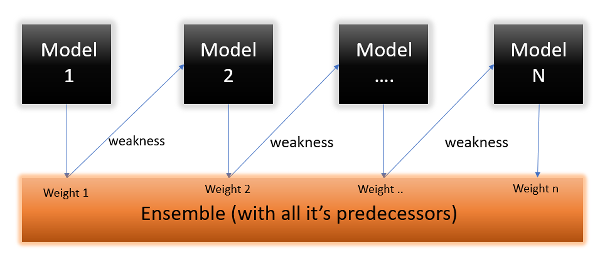

**Pola Kerja AdaBoost(Adaptive Boosting)**

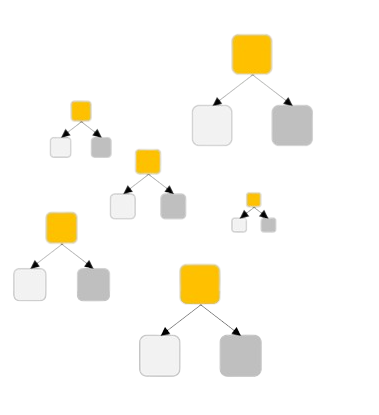
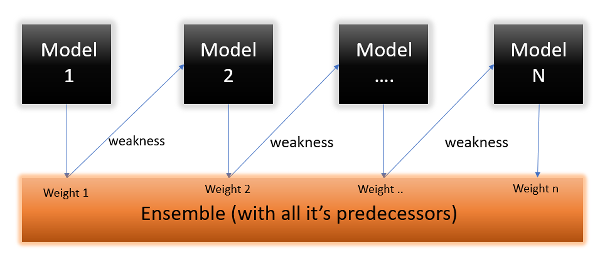

Adaboosting

In [53]:
ada_SMOTE = AdaBoostClassifier(random_state=42)
Impute_Scale_Num = Pipeline([
    ('Impute',IterativeImputer()),
    ('Scale',RobustScaler())
])

transformer_SMOTE = ColumnTransformer([
    ('Numeric',Impute_Scale_Num,Numeric_feat),
    ('Category_least',OneHotEncoder(),Category_feat_least),
    ('Category_most',BinaryEncoder(),Category_feat_Most)
],remainder='passthrough')

In [54]:
hyperparam_ada = {
    'model__n_estimators': [650],
    'model__learning_rate': np.arange(0.01, 1.00, 0.02),
    'prep__Numeric__Scale': [RobustScaler(),StandardScaler()],
    'prep__Numeric__Impute':[KNNImputer(),IterativeImputer()]
}

model_pipe_ada_SMOTE = Pipeline([
            ('prep',transformer_SMOTE), 
            ('resampling',smote), 
            ('model', ada_SMOTE)])

gridsearch_ada_SMOTE = GridSearchCV( 
    estimator= model_pipe_ada_SMOTE,
    param_grid= hyperparam_ada,
    cv= 5,
    scoring=f2,
    n_jobs=-1,
)

# Total Iterasi: 200 Kombinasi x 5 Jumlah fold = 1000 Iterasi

In [ ]:
gridsearch_ada_SMOTE.fit(X_train, y_train)

# Estimasi fit 4jam+ (257m 48.4s) tergantung Spec device
# Spec Device saya: Intel core i5-1155G7 dan Ram 8gb 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numeric',
                                                                         Pipeline(steps=[('Impute',
                                                                                          IterativeImputer()),
                                                                                         ('Scale',
                                                                                          RobustScaler())]),
                                                                         Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')),
                                                                        ('Category_least',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('Catego...
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99]),
                         'model__n_estimators': [650],
                         'prep__Numeric__Impute': [KNNImputer(),
                                                   IterativeImputer()],
                         'prep__Numeric__Scale': [RobustScaler(),
                                                  StandardScaler()]},
             scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
gridsearch_ada_SMOTE.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('Impute',
                                                                   KNNImputer()),
                                                                  ('Scale',
                                                                   RobustScaler())]),
                                                  Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')),
                                                 ('Category_least',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('Category_most',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('resampling', SMOTE(random_state=42)),
                ('model',
                 AdaBoostClassifier(learning_rate=0.8499999999999999,
                                    n_estimators=650, random_state=42))])

In [ ]:
gridsearch_ada_SMOTE.best_params_

{'model__learning_rate': 0.8499999999999999,
 'model__n_estimators': 650,
 'prep__Numeric__Impute': KNNImputer(),
 'prep__Numeric__Scale': RobustScaler()}

In [ ]:
print('Before: \n',df_cv.iloc[18,-3])
print()
print('After:\n',gridsearch_ada_SMOTE.best_score_)


Before: 
 0.21953911141998494

After:
 0.24152486256576502


Setelah melakukan Tuning, model mengalami peningkatan accuracy sekitar kurang lebih 3%.

## Predict
Disini saya akan melakukan predict ke test dengan 2 model, yaitu model yang belum di tunning dan sudah tunning.

In [ ]:
# Default model
default_model= Pipeline([
            ('prep',transformer), 
            ('resampling',smote),
            ('model', adaboost)])
default_model.fit(X_train, y_train)
y_pred_def = default_model.predict(X_test)

Score_def_ada = fbeta_score(y_test, y_pred_def,beta=2) 

In [ ]:
# Tuned Model
best_model = gridsearch_ada_SMOTE.best_estimator_
best_model.fit(X_train,y_train)
y_pred_best = best_model.predict(X_test)

Score_tuned_ada = fbeta_score(y_test, y_pred_best,beta=2)

In [ ]:
print(f'Adaboost Default:   {Score_def_ada}')
print(f'Adaboost Tuned:     {Score_tuned_ada}')

Adaboost Default:   0.19450033534540578
Adaboost Tuned:     0.1975806451612903


Adanya perningkatan accuracy pada Model yang sudah di Tuning, akan tetapi peningkatannya tidak besar.

## Confusion Matrix & Classification Report

In [ ]:
conf_default = confusion_matrix(y_test,y_pred_def)
conf_tuned = confusion_matrix(y_test,y_pred_best)

print('Confusion Matrix Default \n', conf_default)
print()
print('Confusion Matrix Tuned \n', conf_tuned)

Confusion Matrix Default 
 [[6421  973]
 [  57   58]]

Confusion Matrix Tuned 
 [[6663  731]
 [  66   49]]


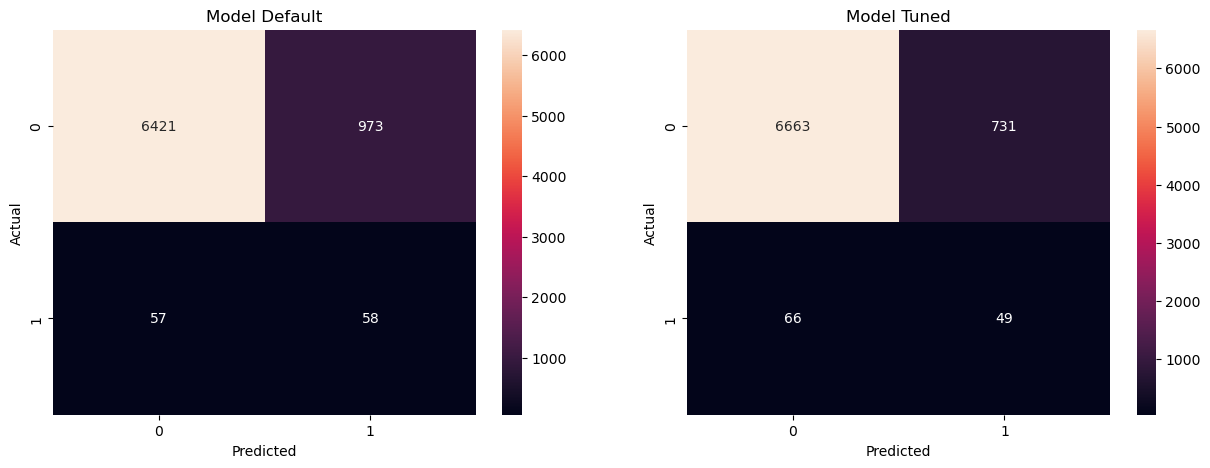

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(data=confusion_matrix(y_test, y_pred_def), annot=True, fmt='.0f')
plt.title('Model Default')
plt.xlabel('Predicted')
plt.ylabel('Actual');

plt.subplot(1,2,2)
sns.heatmap(data=confusion_matrix(y_test, y_pred_best), annot=True, fmt='.0f')
plt.title('Model Tuned')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [ ]:
report_default = classification_report(y_test,y_pred_def)
report_tuned =  classification_report(y_test,y_pred_best)

print('Classification Report Default AdaBoost: \n', report_default)
print()
print('Classification Report Tuned AdaBoost: \n', report_tuned)

Classification Report Default AdaBoost: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      7394
           1       0.06      0.50      0.10       115

    accuracy                           0.86      7509
   macro avg       0.52      0.69      0.51      7509
weighted avg       0.98      0.86      0.91      7509


Classification Report Tuned AdaBoost: 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      7394
           1       0.06      0.43      0.11       115

    accuracy                           0.89      7509
   macro avg       0.53      0.66      0.53      7509
weighted avg       0.98      0.89      0.93      7509



Berdasarkan Confusion matrix dan Classifaction Report, Model saya yang sudah di Tuned menjadi tambah buruk. Kemampuan Prediksi True Postive (TP) yang sudah di tuned turun dari 50% menjadi 43% akan tetapi kemampuan Prediksi True Negative (TN) yang sudah Tuned naik dari 87% menjadi 90%. Bagaimana hal ini terjadi?

Hal ini disebabkannya parameter yang saya berikan untuk model yang dituned dengan nilai `n_estimator` yang saya berikan sangat besar yaitu `650` dan kemudian data minoritas yang saya resamppling dengan metode SMOTE akan membuat data sinstesi yang sumbernya berasal dari data minoritas yang sudah ada. Jadi hal ini menyebabkan terjadinya hal overviting walaupun data minoritas dibuat menjadi seimbang tapi data sinstesinya hanya berada di kisaran nilai data minortias yang sudah ada jadi hal ini menyebabkan mesin tidak baik karena terlalu mempelajarainya.

Maka dari itu saya akan menggunakan AdaBoost yang belum dituned, sebab pada kasus ini Perusahaan ingin mempunyai ML untuk prediksi calon customer yang akan klaim, maka dari itu saya akan fokus lebih pada FN(False Negative).

## Optimize Threshold

Di sini saya mencari nilai threshold yang baik, bahwa threshold yang terbaik adalah 0.50 atau 50% yang berati jika nilai predict proba nya diatas 50% maka memasuki kelas 1 atau claim, dan sebaliknya jika nilai predict proba nya dibawah 50% maka memasuki kelas 0 atau tidak akan claim.

Note: Secara Default Threshold adalah 0.50 atau 50%, Jadi 50% sudah menjadi threshold yang terbaik.

In [ ]:
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f2 = []
list_precision = []
list_recall = []

for threshold in list_threshold:

    # predict
    y_pred_proba = default_model.predict_proba(X_test)[:, 1]    # hasil prediksi dalam bentuk probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # yg probability-nya di atas threshold masuk ke kelas 1 

    # f2 score
    list_f2.append(fbeta_score(y_test, y_pred_class,beta=2))
    list_precision.append(precision_score(y_test,y_pred_class,zero_division=1))
    list_recall.append(recall_score(y_test,y_pred_class))

In [ ]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2'] = list_f2
df_th['precision'] = list_precision
df_th['recall'] = list_recall

df_th.sort_values('f2',ascending=False).head(5)

,threshold,f2,precision,recall
49,0.50,0.194500,0.056256,0.504348
50,0.51,0.131234,0.066225,0.173913
48,0.49,0.103185,0.023012,0.800000
47,0.48,0.078992,0.016905,0.965217
46,0.47,0.075144,0.015990,1.000000


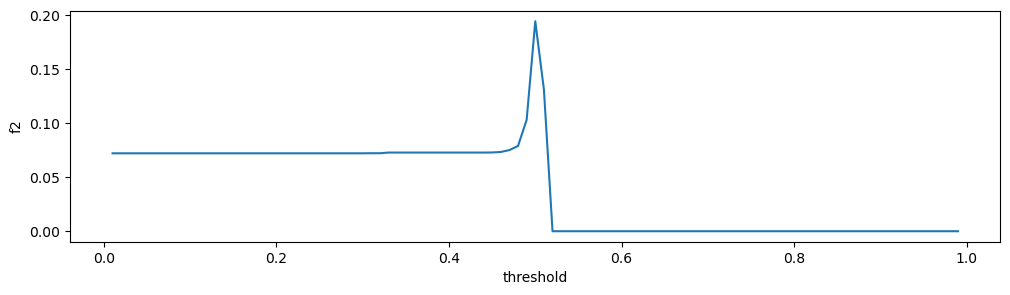

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(data=df_th,x='threshold',y='f2');

## Feature Importances

Mari sekarang saya lihat fitur/kolom apa saja yang paling penting untuk model AdaBoost Saya

Berikut stepnya:
- Pertama saya ambil nama fitur/kolom yang sudah melewati tahap preprocessing, kemudian saya buat menjadi list dalam variable baru.
- saya gabungkan setiap nama kolomnya sesuai urutan transformernya dan simpan dalam variable baru bernama all_feature.
- setelah itu saya buat variable baru lagi bernama fet_import, dimana saya mengambil fitur-fitur penting dalam bentuk series dan saya urutkan dari terbesar.
- Saya tentukan nama index fet_imprt dari kolom all_feature karena awalnya indexnya hanya berbentuk angka sekarang indexnya mempunyai nama.
- Saya buat menjadi plot bar horizontal fet_import-nya dan memberi judul 'Title Importances'    


In [ ]:
col_Num = list(transformer.transformers_[0][1].get_feature_names_out())
col_Cat_least = list(transformer.transformers_[1][1].get_feature_names_out())
col_Cat_Most = list(transformer.transformers_[2][1].get_feature_names_out())

In [ ]:
all_feature = col_Num + col_Cat_least + col_Cat_Most

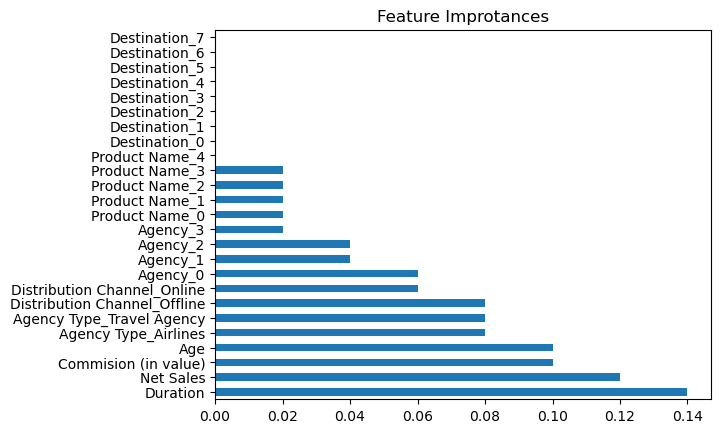

In [ ]:
fet_import = pd.Series(default_model['model'].feature_importances_).sort_values(ascending=False)
fet_import.index =all_feature
fet_import.plot(kind='barh',title='Feature Improtances')
plt.show()

Terlihat bahwa ternyata untuk model AdaBoost fitur `Destination` tidak menjadi fitur yang penting untuk model saya ini. fitur `Duration` menjadi fitur yang sangat penting untuk model saya ini. Dari sini saya ingin melihat nilai penyebaran durasi perjalanan yang klaim dan tidak klaim dengan barplot dan boxplot

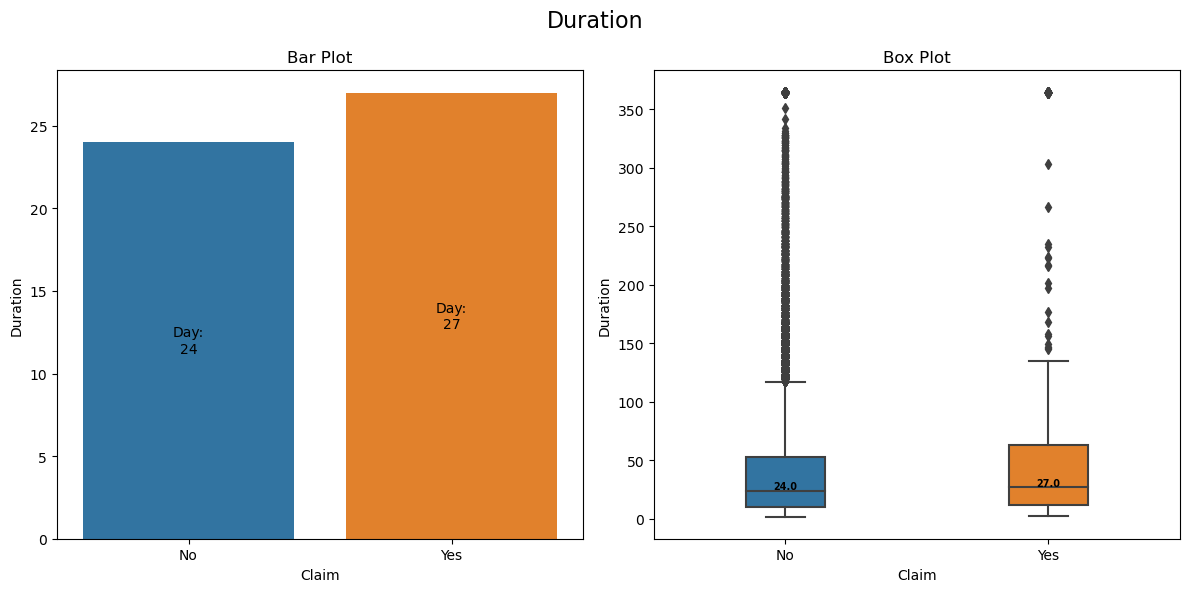

In [ ]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot di subplot pertama (ax1)
sns.barplot(data=df, x='Claim', y='Duration', estimator=np.median, errorbar=('ci',0), ax=ax1)
ax1.bar_label(ax1.containers[-1], fmt='Day:\n%.0f', label_type='center')
ax1.set_title("Bar Plot")
ax1.set_xticklabels(['No', 'Yes'])

# Box plot di subplot kedua (ax2)
box_plot = sns.boxplot(data=df, x='Claim', y='Duration', ax=ax2, width=0.3)
ax2.set_title("Box Plot")
ax2.set_xticklabels(['No', 'Yes'])
medians = df.groupby(['Claim'])['Duration'].median()
vertical_offset = (df['Duration'].median() * 0.05) #  untuk nilai median display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='black',weight='semibold')



plt.suptitle("Duration", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
No = df[df['Claim']== 0].describe()
Yes = df[df['Claim']==1].describe()

In [ ]:
Q1_No = No.loc['25%','Duration']
Q3_No = No.loc['75%','Duration']
Iqr_No = Q3_No-Q1_No
Upperbound_No = Q3_No + 1.5*Iqr_No

Q1_Yes = Yes.loc['25%','Duration']
Q3_Yes = Yes.loc['75%','Duration']
Iqr_Yes = Q3_Yes-Q1_Yes
Upperbound_Yes = Q3_Yes + 1.5*Iqr_Yes

print('No UpperBound: ')
print(Upperbound_No)
print()
print('Yes UpperBound: ')
print(Upperbound_Yes)

No UpperBound: 
117.5

Yes UpperBound: 
138.25


In [ ]:
Outlier_No = len(df[(df['Duration']>117.5) & (df['Claim']==0)])
Outlier_Yes = len(df[(df['Duration']>138.25) & (df['Claim']==1)])

print('Jumlah Baris Data Outliers Kategori Claim: No')
print(Outlier_No)
print()
print('Jumlah Baris Data Outliers Kategori Claim: Yes')
print(Outlier_Yes)

Jumlah Baris Data Outliers Kategori Claim: No
2723

Jumlah Baris Data Outliers Kategori Claim: Yes
64


Berati dari hal yang bisa diambil dari barplot di atas:
- Rata-rata customer yang tidak klaim melakukan perjalanan kurang lebih `24` hari dan untuk rata-rata customer yang klaim melakukan perjalanan kurang lebih `27` hari.
- Penyebaran Outliers:
    - Duration (Claim: No) yang diatas `117` hari, merupakan nilai outlier dengan total 2723 baris.
    - Duration (Claim: Yes) yang diatas `138` hari, merupakan nilai outlier dengan total 64 baris.

## Conclusion & Recommendation

In [ ]:
print('Classification Report Default AdaBoost: \n', report_default)

Classification Report Default AdaBoost: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      7394
           1       0.06      0.50      0.10       115

    accuracy                           0.86      7509
   macro avg       0.52      0.69      0.51      7509
weighted avg       0.98      0.86      0.91      7509



Berdasarkan hasil classification report dari model saya, saya menyimpulkan bahwa bila seandainya nanti model saya ini digunakan untuk memprediksi customer mana yang akan claim, maka model saya ini dapat mengurangi 87% customer yang tidak akan claim asuransinya, dan model saya ini dapat memprediksi 50% customer yang akan claim dari seluruh customer yang perusahaan travel insurance ini miliki (Semua ini berdasarkan recallnya)

Di sini saya akan membuat skenario, andaikan ada 2000 customer yang sudah mempunyai polis. Mereka melakukan perjalanan internasional dengan durasi 10-14 hari dan diprediksi tidak akan klaim (Tanpa ML). Dalam kasus ini saya akan berfokus pada klaim berjenis pencurian uang pribadi. (informasi ini berdasarkan https://lifepal.co.id/asuransi/perjalanan-allianz/ & https://www.allianz.co.id/content/dam/onemarketing/azli/wwwallianzcoid/produk/asuransi-umum/asuransi-perjalanan/travelpro/Tabel-Manfaat-TravelPro-(with-enhanced-benefit).pdf ), Maka hitunganya kurang lebih akan seperti dibawah ini:

Note: Mata uang ini saya ubah dari IDR menjadi AUD agar mudah dihitung (1 AUD = Rp.10,000)<br>
Harga Premi = $10 Aud<br>
Claim = $300 Aud

Tanpa Model (Diprediksi secara manual):

- Total Premi: 2000 x 10 = 82,000 AUD
- Total Customer aktual tidak klaim: 1960 orang (98% dari 2000 orang)
- Total Customer aktual yang klaim: 40 orang (1,5% dari 2000 orang)
- Total keuntungan: 1960 x 10 - 40 x 300 = 19600 - 12000 = $7,600 Aud
- Confusion Matrix = TN:1960, FP:0 ,FN:40, TP:0

Dengan Model (hanya customer yang diprediksi oleh model akan claim):

- Total yang aktualnya tidak klaim dan benar diprediksi = 1704 orang
- Total yang aktualnya tidak klaim tapi salah prediksi = 257 orang
- Total Customer yang benar diprediksi akan klaim : 20 orang
- Total Customer yang gagal diprediksi akan klaim : 20 orang 
- Total keuntungan : (1704 x 10) - (257 x 10) - (20 x 300) = 17,030 - 2,570 - 6,000 = $8,460 Aud
- Confusion Matrix = TN:1704, FP:257, FN:20, TP:20

Berdasarkan contoh diatas, terlihat bahwa dengan menggunakan model saya, perusahaan dapat memprediksi 20 orang yang akan klaim, maka perusahaan mengalami keuntungan $860 AUD karena tau bahwa 20 orang itu akan klaim maka tidak ditawarkan, akan tetapi ML saya masih gagal memprediksi 20 orang yang lain bahwa orang tersebut diprediksi tidak akan klaim tapi kenyataan klaim.

Best Model:<br>
AdaBoosting dengan parameter:
- 'model__learning_rate': 0.849,
- 'model__n_estimators': 650,
- 'prep__Numeric__Impute': KNNImputer,
- 'prep__Numeric__Scale': RobustScaler

## Recommendation

Hal-hal yang dapat bisa dilakukan untuk mengembangkan modelnya lebih baik lagi:

- Menambahkan informasi dataset dengan yang baru atau lama selain dataset ini, dikarenakan sangat buruknya proposi yang dimiliki dataset ini. Dan menyebabkan masih kurang untuk memprediksi seorang calon customer yang akan klaim.
- Mencoba Alogritma yang belum saya coba seperti CatBoostClassifier,HistGradientBoostingClassifier dan lain-lain.
- Mencoba memperluas kombinasi model dengan memperbanyak parameter apa saja yang bisa dituning. Karena pada saat ini kertebatasan daya komputasi saya.
- Menggunakan metode pencarian paramater terbaik untuk model selain Gridsearch seperti menggunakan Optuna, HalvingGridSearchCV dan lain-lain.


## Save Model

In [ ]:
# Before Tuned
estimator_Def = Pipeline([
                ('prep',transformer), 
                ('resampling',smote),
                ('model', adaboost)])
estimator_Def.fit(X,y)
pickle.dump(estimator_Def, open(r'Model_travel_Insurance_Default.sav','wb'))

In [ ]:
# After Tuned
estimator_Tuned = gridsearch_ada_SMOTE.best_estimator_
estimator_Tuned.fit(X,y)

pickle.dump(estimator_Tuned, open(r'Model_travel_Insurance_Tuned.sav','wb'))